In [ ]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 628.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In this code:

The image is first converted to grayscale to simplify processing.
Gaussian blur is applied to reduce noise.
Histogram equalization is used to enhance the contrast of the image.
The OCR process is then performed on the preprocessed image.
This code will display the grayscale image, blurred image, and equalized image before performing OCR on the preprocessed image. It helps in visualizing the effect of each preprocessing step.

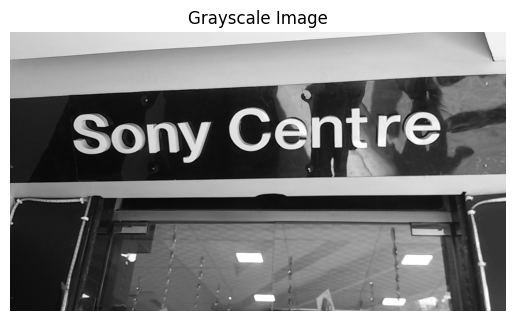

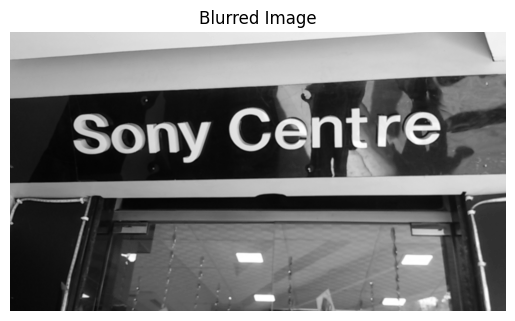

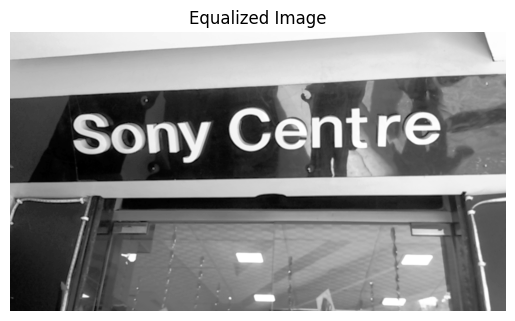

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete([[146, 170], [1131, 170], [1131, 354], [146, 354]], 'Sony Centre', 0.9979489048285364)
Recognized Text: Sony Centre


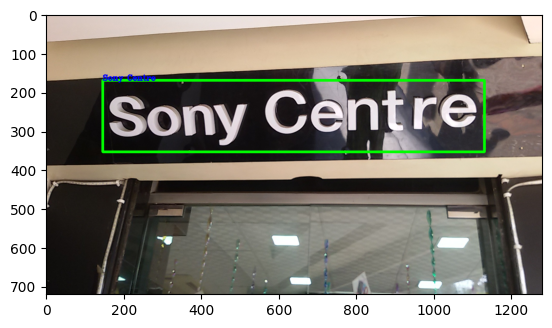

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# read image
image_path = '/content/img1.jpg'
img = cv2.imread(image_path)

# Convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Noise reduction using Gaussian blur
blur_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
plt.imshow(blur_img, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()

# Enhance contrast using histogram equalization
equalized_img = cv2.equalizeHist(blur_img)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.show()

# instance text detector
reader = easyocr.Reader(['en'], gpu=False)

# detect text on preprocessed image
text_ = reader.readtext(equalized_img)

threshold = 0.25
# draw bbox and text
for t_, t in enumerate(text_):
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)

        # Print recognized text
        print("Recognized Text:", text)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


([[141, 161], [1133, 161], [1133, 356], [141, 356]], 'Sony Centre', 0.9970587402509232)
Recognized Text: Sony Centre


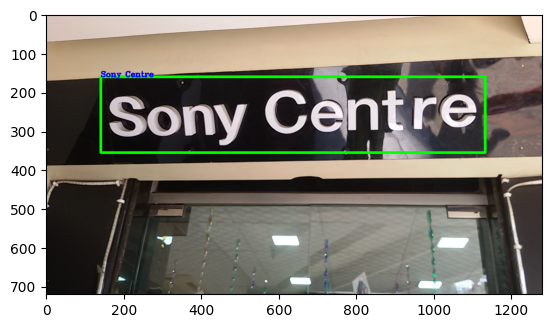

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# read image
image_path = '/content/img1.jpg'
img = cv2.imread(image_path)

# instance text detector
reader = easyocr.Reader(['en'], gpu=False)

# detect text on image
text_ = reader.readtext(img)

threshold = 0.25
# draw bbox and text
for t_, t in enumerate(text_):
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)

        # Print recognized text
        print("Recognized Text:", text)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


([[258, 4], [511, 4], [511, 59], [258, 59]], 'ATea Stall', 0.7035642875376342)
Recognized Text: ATea Stall
([[32, 114], [62, 114], [62, 154], [32, 154]], '1', 0.9999785424429888)
Recognized Text: 1
([[146, 106], [618, 106], [618, 158], [146, 158]], 'A tea stall is a small', 0.6928985901740918)
Recognized Text: A tea stall is a small
([[131, 208], [403, 208], [403, 258], [131, 258]], 'restaurant.', 0.9862311216548915)
Recognized Text: restaurant.
([[27, 313], [67, 313], [67, 355], [27, 355]], '2', 0.9999997615814351)
Recognized Text: 2
([[132, 310], [280, 310], [280, 358], [132, 358]], 'It is 0', 0.7127128056507971)
Recognized Text: It is 0
([[271, 298], [660, 298], [660, 378], [271, 378]], 'place for people', 0.5343164661047867)
Recognized Text: place for people


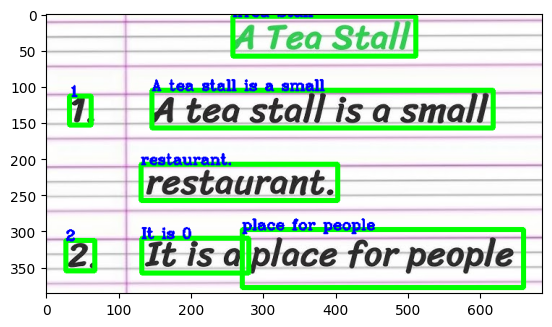

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# read image
image_path = '/content/img2.jpeg'
img = cv2.imread(image_path)

# instance text detector
reader = easyocr.Reader(['en'], gpu=False)

# detect text on image
text_ = reader.readtext(img)

threshold = 0.25

# draw bbox and text
for t_, t in enumerate(text_):
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)

        # Print recognized text
        print("Recognized Text:", text)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
!pip install googletrans==4.0.0-rc1


Here are some commonly used language codes for various languages:

English: en

Spanish: es

French: fr

German: de

Italian: it

Russian: ru

Japanese: ja


([[258, 4], [511, 4], [511, 59], [258, 59]], 'ATea Stall', 0.7035642875376342)
Recognized Text: ATea Stall
Translated Text: एथिया स्टाल
([[32, 114], [62, 114], [62, 154], [32, 154]], '1', 0.9999785424429888)
Recognized Text: 1
Translated Text: 1
([[146, 106], [618, 106], [618, 158], [146, 158]], 'A tea stall is a small', 0.6928985901740918)
Recognized Text: A tea stall is a small
Translated Text: एक चाय स्टाल एक छोटा है
([[131, 208], [403, 208], [403, 258], [131, 258]], 'restaurant.', 0.9862311216548915)
Recognized Text: restaurant.
Translated Text: रेस्टोरेंट।
([[27, 313], [67, 313], [67, 355], [27, 355]], '2', 0.9999997615814351)
Recognized Text: 2
Translated Text: 2
([[132, 310], [280, 310], [280, 358], [132, 358]], 'It is 0', 0.7127128056507971)
Recognized Text: It is 0
Translated Text: यह 0 है
([[271, 298], [660, 298], [660, 378], [271, 378]], 'place for people', 0.5343164661047867)
Recognized Text: place for people
Translated Text: लोगों के लिए जगह


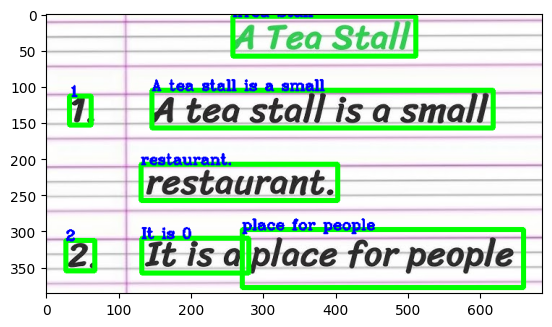

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt
from googletrans import Translator

# read image
image_path = '/content/img2.jpeg'
img = cv2.imread(image_path)

# instance text detector
reader = easyocr.Reader(['en'], gpu=False)

# detect text on image
text_ = reader.readtext(img)

threshold = 0.25
# draw bbox and text
for t_, t in enumerate(text_):
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)

        # Print recognized text
        print("Recognized Text:", text)

        # Translate text
        translator = Translator()
        translation = translator.translate(text, dest='hi')  # Translate to French
        print("Translated Text:", translation.text)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


([[258, 4], [511, 4], [511, 59], [258, 59]], 'ATea Stall', 0.7035642875376342)
Recognized Text: ATea Stall
Translated Text: एथिया स्टाल
([[32, 114], [62, 114], [62, 154], [32, 154]], '1', 0.9999785424429888)
Recognized Text: 1
Translated Text: 1
([[146, 106], [618, 106], [618, 158], [146, 158]], 'A tea stall is a small', 0.6928985901740918)
Recognized Text: A tea stall is a small
Translated Text: एक चाय स्टाल एक छोटा है
([[131, 208], [403, 208], [403, 258], [131, 258]], 'restaurant.', 0.9862311216548915)
Recognized Text: restaurant.
Translated Text: रेस्टोरेंट।
([[27, 313], [67, 313], [67, 355], [27, 355]], '2', 0.9999997615814351)
Recognized Text: 2
Translated Text: 2
([[132, 310], [280, 310], [280, 358], [132, 358]], 'It is 0', 0.7127128056507971)
Recognized Text: It is 0
Translated Text: यह 0 है
([[271, 298], [660, 298], [660, 378], [271, 378]], 'place for people', 0.5343164661047867)
Recognized Text: place for people
Translated Text: लोगों के लिए जगह

Translated Texts:
एथिया स्टाल


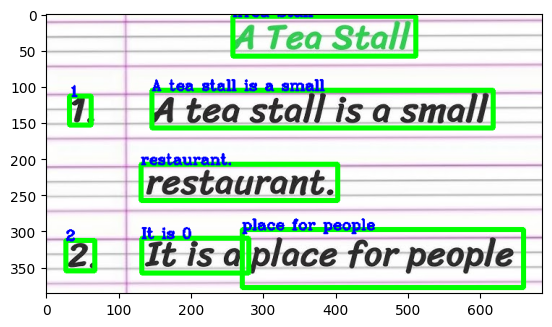

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt
from googletrans import Translator

# read image
image_path = '/content/img2.jpeg'
img = cv2.imread(image_path)

# instance text detector
reader = easyocr.Reader(['en'], gpu=False)

# detect text on image
text_ = reader.readtext(img)

# List to store translated text
translated_texts = []

threshold = 0.25
# draw bbox and text
for t_, t in enumerate(text_):
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)

        # Print recognized text
        print("Recognized Text:", text)

        # Translate text
        translator = Translator()
        translation = translator.translate(text, dest='hi')  # Translate to Hindi
        translated_text = translation.text
        translated_texts.append(translated_text)

        print("Translated Text:", translated_text)

# Display all translated text together
print("\nTranslated Texts:")
for translated_text in translated_texts:
    print(translated_text)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
